In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

In [4]:
train_data.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'target'],
      dtype='object')

In [5]:
train_data.groupby(['race', 'sex']).mean()

id        age         fnlwgt  \
race               sex                                              
Amer-Indian-Eskimo Female   8721.885714  38.614286  126253.828571   
                   Male     8961.526316  38.063158  123449.463158   
Asian-Pac-Islander Female  10315.365482  35.401015  151437.309645   
                   Male     9571.000000  38.426735  171694.431877   
Black              Female   9202.054273  37.613164  214048.775982   
                   Male     8896.718900  37.498804  239637.965311   
Other              Female   9680.277778  31.305556  174661.458333   
                   Male     8401.516484  34.527473  203378.439560   
White              Female   8977.973319  36.741942  182440.401708   
                   Male     8509.615679  39.998821  189440.403281   

                           education.num  capital.gain  capital.loss  \
race               sex                                                 
Amer-Indian-Eskimo Female       9.657143    579.957143      0.000000   
                   Male         9.010526   1029.294737     36.442105   
Asian-Pac-Islander Female      10.375635   1180.035533     58.695431   
                   Male        11.167095   2000.043702    100.830334   
Black              Female       9.493072    598.374134     39.057737   
                   Male         9.349282    569.379187     93.771531   
Other              Female       8.902778    385.541667     54.930556   
                   Male         8.835165   1245.109890    103.703297   
White              Female      10.078975    547.578655     61.509925   
                   Male        10.100894   1372.454956     98.054524   

                           hours.per.week    target  
race               sex                               
Amer-Indian-Eskimo Female       36.400000  0.114286  
                   Male         44.115789  0.168421  
Asian-Pac-Islander Female       37.213198  0.096447  
                   Male         40.637532  0.300771  
Black              Female       37.000000  0.056582  
                   Male         40.028708  0.172249  
Other              Female       35.194444  0.069444  
                   Male         42.681319  0.109890  
White              Female       35.678762  0.117609  
                   Male         42.271932  0.313096

In [6]:
train_data['race_sex'] = train_data['race'].map(str)+'_'+train_data['sex']
test_data['race_sex'] = test_data['race'].map(str)+'_'+test_data['sex']

In [7]:
train_data.drop(['race', 'sex'], axis=1, inplace=True)
test_data.drop(['race', 'sex'], axis=1, inplace=True)

train_data['marital.status'] = train_data['marital.status'].replace(['Never-married','Divorced','Widowed','Separated'], 'alone')
test_data['marital.status'] = test_data['marital.status'].replace(['Never-married','Divorced','Widowed','Separated'], 'alone')
train_data['marital.status'] = train_data['marital.status'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'not alone')
test_data['marital.status'] = test_data['marital.status'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'not alone')
train_data['marital.status']=train_data['marital.status'].map({'not alone':1,'alone':0})
test_data['marital.status']=test_data['marital.status'].map({'not alone':1,'alone':0})

In [8]:
#train_data.dropna(axis=0,subset=['workclass','occupation','native.country'],inplace = True)

In [9]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train_data)

결측치가 있는 컬럼은: workclass 입니다
해당 컬럼에 총 1836 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: occupation 입니다
해당 컬럼에 총 1843 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: native.country 입니다
해당 컬럼에 총 583 개의 결측치가 존재합니다.


In [10]:
type1= train_data['workclass'].isna()
type2= train_data['occupation'].isna()
type3= train_data['capital.gain'] < 5000

two_na=train_data[type1&type2&type3]

In [11]:
two_na_cate = two_na.drop(['id','workclass','occupation', 'age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week'], axis=1) #범주형이 아닌 피쳐 drop
two_na_cate.head()

,education,marital.status,relationship,native.country,target,race_sex
15081,HS-grad,0,Not-in-family,United-States,0,White_Female
15082,Some-college,0,Unmarried,United-States,0,Black_Female
15084,Doctorate,0,Not-in-family,United-States,1,White_Male
15086,HS-grad,1,Husband,United-States,0,White_Male
15087,HS-grad,1,Husband,United-States,0,White_Male


In [12]:
print('workclass & occupation 이 na지만, 고소득층인 경우',len(two_na_cate[two_na_cate['target']==1]) )

workclass & occupation 이 na지만, 고소득층인 경우 148


<AxesSubplot:title={'center':'capital gain and marriage'}, xlabel='marital.status', ylabel='capital.gain'>

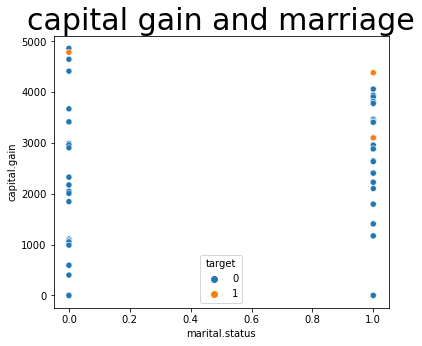

In [13]:
two_na_cate = two_na.drop(['id','workclass','occupation', 'age', 'fnlwgt', 'education.num', 'hours.per.week'],axis = 1) #범주형이 아닌 피쳐 drop

plt.figure(figsize=(6, 5))
plt.title('capital gain and marriage', fontsize = 30)
sns.scatterplot(x = 'marital.status',y= 'capital.gain', hue= 'target', data= two_na_cate)

In [14]:
train_data.drop(two_na.index, inplace=True)

In [15]:
drop_features = ['race', 'sex', 'native.country']
categorical_features = [col for col in train_data.columns if train_data[col].dtype == 'object' and col not in drop_features]
numerical_features = [col for col in train_data.columns if train_data[col].dtype == 'int64' and col not in drop_features]

age
SKEW: 0.5362950367513589
KURT: -0.14405896146396868


C:\Users\LG\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LG\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


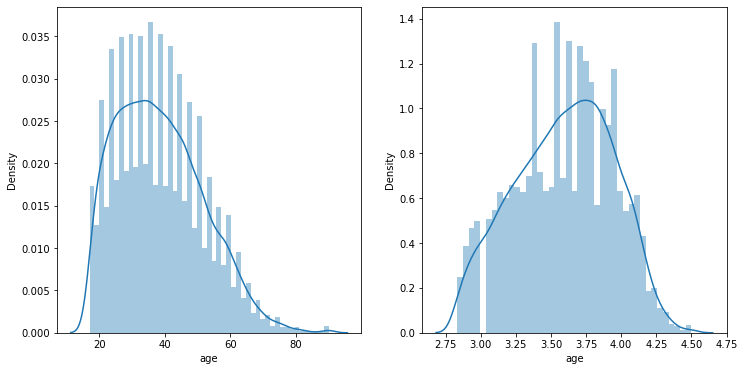

In [16]:
var = numerical_features[1]
print(var)
print('SKEW:',train_data[var].skew())
print('KURT:',train_data[var].kurt())
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.distplot(train_data[var], ax=ax[0])
sns.distplot(np.log(train_data[var]), ax=ax[1])
train_data[f'log_{var}']=np.log(train_data[var])
test_data[f'log_{var}']=np.log(test_data[var])

fnlwgt
SKEW: 1.4152295769899679
KURT: 6.2224621861756635


C:\Users\LG\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LG\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


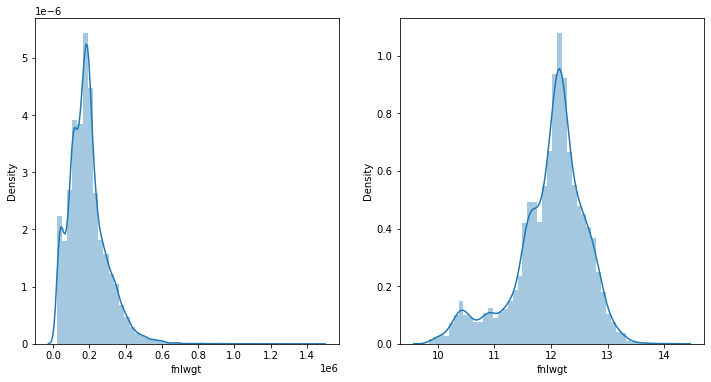

In [17]:
var = numerical_features[2]
print(var)
print('SKEW:',train_data[var].skew())
print('KURT:',train_data[var].kurt())
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.distplot(train_data[var], ax=ax[0])
sns.distplot(np.log(train_data[var]), ax=ax[1])
train_data[f'log_{var}']=np.log(train_data[var])
test_data[f'log_{var}']=np.log(test_data[var])

education.num


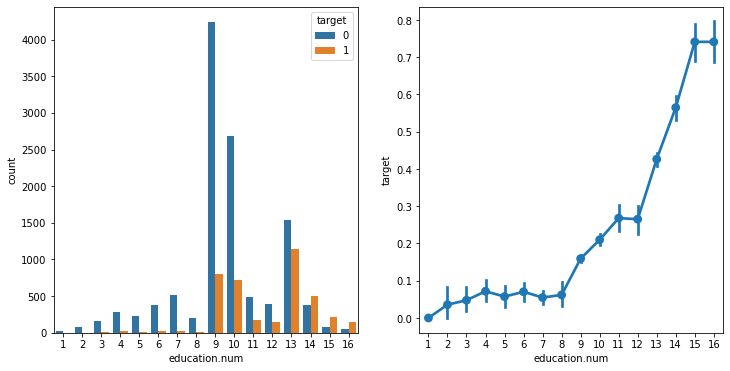

In [18]:
var = numerical_features[3]
print(var)
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.countplot(x=var, hue='target', data=train_data, ax=ax[0])
sns.pointplot(y='target', x=var, data=train_data, ax=ax[1])
plt.show()

In [19]:
train_data['edu'] = 0
index = train_data[(train_data['education.num']==9) | (train_data['education.num']==10)].index
train_data.loc[index, 'edu'] = 1
index = train_data[(train_data['education.num']==11) | (train_data['education.num']==12)].index
train_data.loc[index, 'edu'] = 2
index = train_data[(train_data['education.num']>=13)].index
train_data.loc[index, 'edu'] = 3

test_data['edu'] = 0
index = test_data[(test_data['education.num']==9) | (test_data['education.num']==10)].index
test_data.loc[index, 'edu'] = 1
index = test_data[(test_data['education.num']==11) | (test_data['education.num']==12)].index
test_data.loc[index, 'edu'] = 2
index = test_data[(test_data['education.num']>=13)].index
test_data.loc[index, 'edu'] = 3

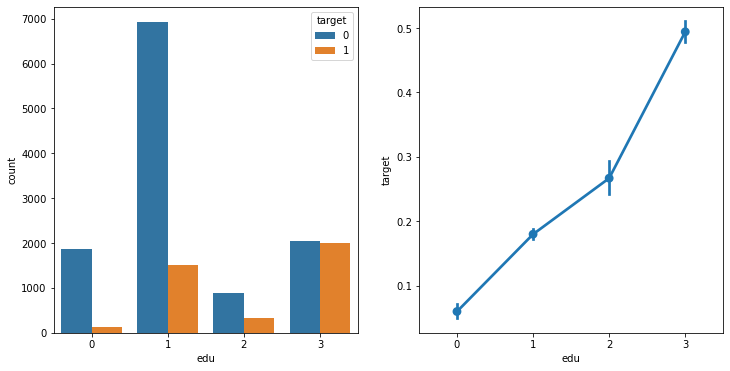

In [20]:
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.countplot(x='edu', hue='target', data=train_data, ax=ax[0])
sns.pointplot(y='target', x='edu', data=train_data, ax=ax[1])
plt.show()

marital.status
SKEW: 0.054320393504020105
KURT: -1.9973038744254354


C:\Users\LG\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LG\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


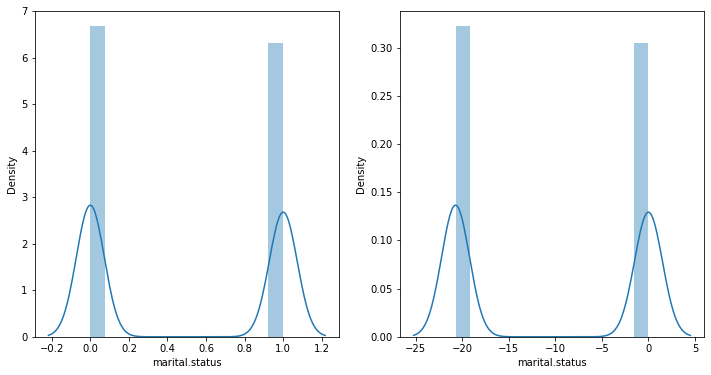

In [21]:
var = numerical_features[4]
print(var)
print('SKEW:',train_data[var].skew())
print('KURT:',train_data[var].kurt())
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.distplot(train_data[var], ax=ax[0])
sns.distplot(np.log(train_data[var]+1e-9), ax=ax[1])
train_data[f'log_{var}']=np.log(train_data[var]+1e-9)
test_data[f'log_{var}']=np.log(test_data[var]+1e-9)

capital.gain
SKEW: 11.286129442383395
KURT: 137.30199198569633


C:\Users\LG\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LG\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


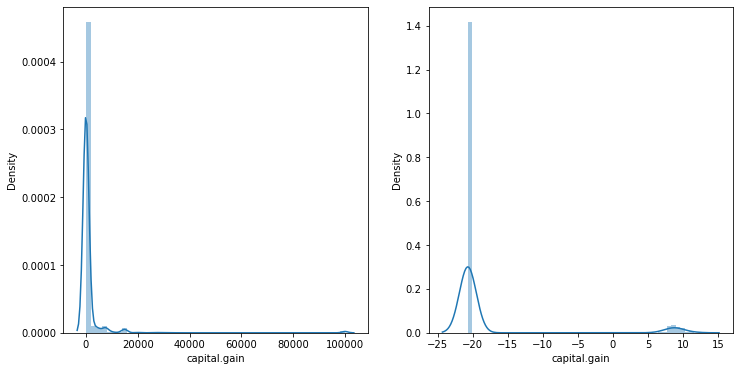

In [22]:
var = numerical_features[5]
print(var)
print('SKEW:',train_data[var].skew())
print('KURT:',train_data[var].kurt())
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.distplot(train_data[var], ax=ax[0])
sns.distplot(np.log(train_data[var]+1e-9), ax=ax[1])
train_data[f'log_{var}']=np.log(train_data[var]+1e-9)
test_data[f'log_{var}']=np.log(test_data[var]+1e-9)

capital.loss
MEAN: 86.32245730308438
STD: 399.94413448754534


C:\Users\LG\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LG\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


MEAN: -19.422270033221963
STD: 5.920149838596309


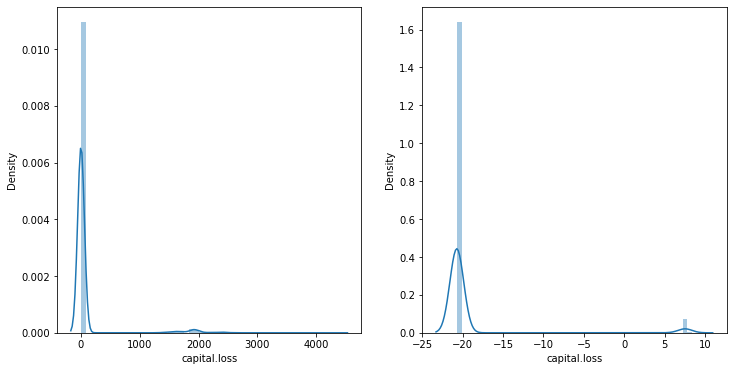

In [23]:
var = numerical_features[6]
print(var)
print('MEAN:',train_data[var].mean())
print('STD:',train_data[var].std())
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.distplot(train_data[var], ax=ax[0])
sns.distplot(np.log(train_data[var]+1e-9), ax=ax[1])
train_data[f'log_{var}']=np.log(train_data[var]+1e-9)
test_data[f'log_{var}']=np.log(test_data[var]+1e-9)
print('MEAN:',train_data[f'log_{var}'].mean())
print('STD:',train_data[f'log_{var}'].std())

In [24]:
from sklearn.preprocessing import LabelEncoder

for var in categorical_features:
    le = LabelEncoder()
    le.fit(train_data[var])
    train_data[var] = le.transform(train_data[var])
    test_data[var] = le.transform(test_data[var])

In [27]:
train_data.drop('fnlwgt', axis=1, inplace=True)
test_data.drop('fnlwgt', axis=1, inplace=True)

In [28]:
from pycaret.classification import *
import scipy, sklearn, lightgbm, pycaret

In [29]:
exp = setup(data=train_data, 
            target='target',
            fold_shuffle=True,
            imputation_type='iterative',
            session_id = 42
           )

,Description,Value
0,session_id,42
1,Target,target
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(15692, 20)"
5,Missing Values,True
6,Numeric Features,14
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Make_Time_Features' object has no attribute 'list_of_features'

In [30]:
best_model= compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8626,0.9183,0.6543,0.7689,0.7065,0.6177,0.6214,0.6920
catboost,CatBoost Classifier,0.8621,0.9195,0.6388,0.7769,0.7005,0.6121,0.6175,6.8800
gbc,Gradient Boosting Classifier,0.8571,0.9158,0.5932,0.7906,0.6771,0.5878,0.5982,2.0700
xgboost,Extreme Gradient Boosting,0.8547,0.9126,0.6446,0.7469,0.6913,0.5971,0.6003,2.5290
ada,Ada Boost Classifier,0.8529,0.9107,0.5993,0.7697,0.6727,0.5799,0.5882,0.7470
rf,Random Forest Classifier,0.8484,0.8988,0.5982,0.7523,0.6662,0.5698,0.5762,1.2710
et,Extra Trees Classifier,0.8372,0.8843,0.5838,0.7204,0.6445,0.5405,0.5458,1.3630
lda,Linear Discriminant Analysis,0.8126,0.8432,0.4514,0.7023,0.5490,0.4379,0.4552,0.1810
lr,Logistic Regression,0.8125,0.8351,0.4281,0.7178,0.5355,0.4274,0.4502,3.7330
ridge,Ridge Classifier,0.8099,0.0000,0.3932,0.7328,0.5109,0.4062,0.4369,0.0700


In [37]:
cb = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8535,0.9062,0.6223,0.7555,0.6824,0.5884,0.5931
1,0.8480,0.9142,0.5791,0.7630,0.6585,0.5631,0.5720
2,0.8817,0.9247,0.6835,0.8190,0.7451,0.6689,0.6735
3,0.8653,0.9273,0.6259,0.7982,0.7016,0.6163,0.6239
4,0.8652,0.9269,0.6835,0.7600,0.7197,0.6313,0.6328
5,0.8616,0.9252,0.6043,0.8000,0.6885,0.6017,0.6115
6,0.8761,0.9240,0.7014,0.7863,0.7414,0.6604,0.6622
7,0.8552,0.9103,0.6007,0.7767,0.6775,0.5861,0.5941
8,0.8634,0.9238,0.6547,0.7712,0.7082,0.6198,0.6233
9,0.8506,0.9124,0.6331,0.7395,0.6822,0.5853,0.5883


In [ ]:
import optuna

tuned_cb = tune_model(create_model('catboost'),
                     n_iter = 100,
                     optimize = 'Accuracy',
                     search_library='optuna',
                     search_algorithm='tpe',
                     early_stopping = True,
                     choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8535,0.9062,0.6223,0.7555,0.6824,0.5884,0.5931
1,0.8480,0.9142,0.5791,0.7630,0.6585,0.5631,0.5720
2,0.8817,0.9247,0.6835,0.8190,0.7451,0.6689,0.6735
3,0.8653,0.9273,0.6259,0.7982,0.7016,0.6163,0.6239
4,0.8652,0.9269,0.6835,0.7600,0.7197,0.6313,0.6328
5,0.8616,0.9252,0.6043,0.8000,0.6885,0.6017,0.6115
6,0.8761,0.9240,0.7014,0.7863,0.7414,0.6604,0.6622
7,0.8552,0.9103,0.6007,0.7767,0.6775,0.5861,0.5941
8,0.8634,0.9238,0.6547,0.7712,0.7082,0.6198,0.6233
9,0.8506,0.9124,0.6331,0.7395,0.6822,0.5853,0.5883


IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:33:04
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


[I 2022-04-27 17:33:05,120] Searching the best hyperparameters using 10984 samples...
Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Speci

In [ ]:
final_cb = finalize_model(tuned_cb)

In [ ]:
pred = predict_model(final_cb, data=test_data)

In [ ]:
submission = pd.read_csv('sample_submission.csv')
submission['target'] = pred['Label']
submission.to_csv('ssss.csv', index=False)

In [ ]:
bag_catboost_50 = ensemble_model(final_cb, n_estimators=50, fold=10, optimize='AUC')